# Read Library for Data Modelling (MLPClassifier)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data_path = ['data']
traindir = ['train']
testdir = ['test']

## For Normal Dataset without Preprocessing

In [2]:
trainpath = os.sep.join(data_path + traindir + ['Train.csv'])

traindf = pd.read_csv(trainpath, sep = ",")
traindf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.25,0.30,14.40,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,6
1,7.8,0.26,0.49,3.20,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,7
2,6.3,0.23,0.33,1.50,0.036,15.0,105.0,0.99100,3.32,0.42,11.2,6
3,6.0,0.26,0.18,7.00,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,5
4,7.9,0.37,0.31,2.85,0.037,5.0,24.0,0.99110,3.19,0.36,11.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3423,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,6
3424,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,6
3425,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,6
3426,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6


In [3]:
testpath = os.sep.join(data_path + testdir + ['Test.csv'])

testdf = pd.read_csv(testpath, sep = ",")
testdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6.4,0.29,0.18,15.0,0.040,21.0,116.0,0.99736,3.14,0.50,9.200000,5
1466,6.4,0.30,0.33,5.2,0.050,30.0,137.0,0.99304,3.26,0.58,11.100000,5
1467,7.0,0.40,0.25,1.8,0.050,51.0,189.0,0.99174,3.00,0.55,11.400000,6
1468,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.600000,7


In [4]:
X_train = traindf.drop("quality", axis=1)
X_test = testdf.drop("quality", axis=1)
y_train = traindf["quality"]
y_test = testdf["quality"]

## For MLPClassifier
- Max_iter from 500 to 2000 by increment of 500
- Hidden Layer set to 1,2,3 hidden layers with 15 hidden units
- Random State to 42
- Include all activation function except "identity"

In [5]:
#Now use GridSearch CV to get the best model

#define the model and parameters
MLP = MLPClassifier(random_state = 42)

parameters = {'max_iter': [500,1000,1500,2000],
              'hidden_layer_sizes':[(15,1),(15,2),(15,3)],
              'activation': ["logistic", "relu", "Tanh"]}

model = GridSearchCV(MLP, param_grid=parameters)
model = model.fit(X_train,y_train)
model.best_estimator_

MLPClassifier(activation='logistic', hidden_layer_sizes=(15, 3), max_iter=500,
              random_state=42)

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         7
           4     0.0000    0.0000    0.0000        40
           5     0.5546    0.6080    0.5801       426
           6     0.5377    0.7051    0.6101       668
           7     0.4724    0.2143    0.2948       280
           8     0.0000    0.0000    0.0000        49

    accuracy                         0.5374      1470
   macro avg     0.2608    0.2546    0.2475      1470
weighted avg     0.4950    0.5374    0.5015      1470



Text(0.5, 1.0, 'Confusion Matrix')

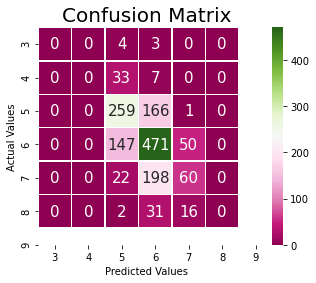

In [6]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels = range(3,10), yticklabels=range(3,10));
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

# 53.74%, Too Weak Try use Modified Dataset

In [2]:
trainpath = os.sep.join(data_path + traindir + ['Train_Modified.csv'])

traindf = pd.read_csv(trainpath, sep = ",")
traindf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.25,0.30,14.40,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,Poor
1,7.8,0.26,0.49,3.20,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,Good
2,6.3,0.23,0.33,1.50,0.036,15.0,105.0,0.99100,3.32,0.42,11.2,Poor
3,6.0,0.26,0.18,7.00,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,Poor
4,7.9,0.37,0.31,2.85,0.037,5.0,24.0,0.99110,3.19,0.36,11.9,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...
3423,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,Poor
3424,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,Poor
3425,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,Poor
3426,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,Poor


In [3]:
testpath = os.sep.join(data_path + testdir + ['Test_Modified.csv'])

testdf = pd.read_csv(testpath, sep = ",")
testdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,Good
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,Good
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,Good
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,Poor
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6.4,0.29,0.18,15.0,0.040,21.0,116.0,0.99736,3.14,0.50,9.200000,Poor
1466,6.4,0.30,0.33,5.2,0.050,30.0,137.0,0.99304,3.26,0.58,11.100000,Poor
1467,7.0,0.40,0.25,1.8,0.050,51.0,189.0,0.99174,3.00,0.55,11.400000,Poor
1468,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.600000,Good


In [4]:
le = LabelEncoder()
traindf['quality'] = le.fit_transform(traindf.quality)
testdf['quality'] = le.fit_transform(testdf.quality)

In [5]:
X_train = traindf.drop("quality", axis=1)
X_test = testdf.drop("quality", axis=1)
y_train = traindf["quality"]
y_test = testdf["quality"]

# Try to use Default Parameter

              precision    recall  f1-score   support

           0     0.5915    0.1277    0.2100       329
           1     0.7949    0.9746    0.8756      1141

    accuracy                         0.7850      1470
   macro avg     0.6932    0.5511    0.5428      1470
weighted avg     0.7494    0.7850    0.7266      1470



Text(0.5, 1.0, 'Confusion Matrix')

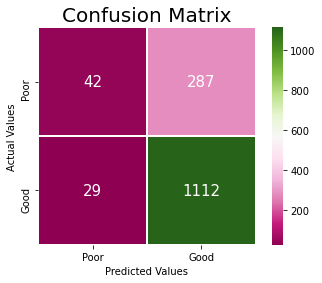

In [6]:
MLP = MLPClassifier().fit(X_train,y_train)
y_pred = MLP.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

In [12]:
#Now use GridSearch CV to get the best model

#define the model and parameters
MLP = MLPClassifier(random_state = 42)

parameters = {'max_iter': [500,1000,1500,2000],
              'hidden_layer_sizes':[(15,1),(15,2),(15,3)],
              'activation': ["logistic", "relu", "Tanh"]}

model = GridSearchCV(MLP, param_grid=parameters)
model = model.fit(X_train,y_train)
model.best_estimator_

MLPClassifier(activation='logistic', hidden_layer_sizes=(15, 1), max_iter=500,
              random_state=42)

              precision    recall  f1-score   support

           0     0.5385    0.3617    0.4327       329
           1     0.8319    0.9106    0.8695      1141

    accuracy                         0.7878      1470
   macro avg     0.6852    0.6362    0.6511      1470
weighted avg     0.7662    0.7878    0.7717      1470



Text(0.5, 1.0, 'Confusion Matrix')

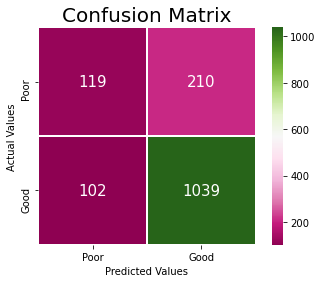

In [13]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

## 78.78%, Close to 80%?
- Try to use StandardScalar for all features

In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
#Now use GridSearch CV to get the best model

#define the model and parameters
MLP = MLPClassifier(random_state = 42)

parameters = {'max_iter': [500,1000,1500,2000],
              'hidden_layer_sizes':[(15,1),(15,2),(15,3)],
              'activation': ["logistic", "relu", "Tanh"]}

model = GridSearchCV(MLP, param_grid=parameters)
model = model.fit(X_train,y_train)
model.best_estimator_

MLPClassifier(hidden_layer_sizes=(15, 3), max_iter=500, random_state=42)

              precision    recall  f1-score   support

           0     0.5514    0.4894    0.5185       329
           1     0.8574    0.8852    0.8711      1141

    accuracy                         0.7966      1470
   macro avg     0.7044    0.6873    0.6948      1470
weighted avg     0.7889    0.7966    0.7922      1470



Text(0.5, 1.0, 'Confusion Matrix')

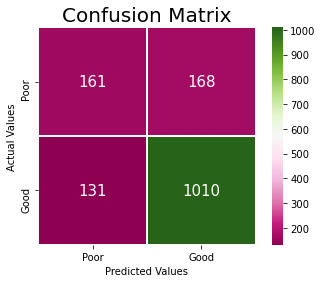

In [19]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

## Improve a little bit?
- Reduce Features to only Density and Alcohol

In [20]:
X_train = traindf[['density','alcohol']]
X_test = testdf[['density','alcohol']]
y_train = traindf["quality"]
y_test = testdf["quality"]

In [22]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
#Now use GridSearch CV to get the best model

#define the model and parameters
MLP = MLPClassifier(random_state = 42)

parameters = {'max_iter': [500,1000,1500,2000],
              'hidden_layer_sizes':[(15,1),(15,2),(15,3)],
              'activation': ["logistic", "relu", "Tanh"]}

model = GridSearchCV(MLP, param_grid=parameters)
model = model.fit(X_train,y_train)
model.best_estimator_

MLPClassifier(hidden_layer_sizes=(15, 1), max_iter=500, random_state=42)

              precision    recall  f1-score   support

           0     0.5878    0.2340    0.3348       329
           1     0.8118    0.9527    0.8766      1141

    accuracy                         0.7918      1470
   macro avg     0.6998    0.5934    0.6057      1470
weighted avg     0.7617    0.7918    0.7553      1470



Text(0.5, 1.0, 'Confusion Matrix')

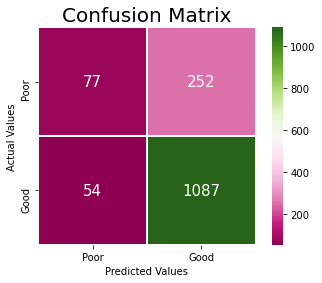

In [24]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

## Decrease a little bit?
- Add Features named 'chlorides', 'volatile acidity' and 'total sulfur dioxide'
- Make GridSearchCV scoring to Accuracy
- Random State set to from 40 - 45 and reduce Max_iter to 500 to 1000 for GridSearch

In [4]:
X_train = traindf[['density','alcohol', 'chlorides', 'volatile acidity', 'total sulfur dioxide']]
X_test = testdf[['density','alcohol', 'chlorides', 'volatile acidity', 'total sulfur dioxide']]
y_train = traindf["quality"]
y_test = testdf["quality"]

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [6]:
#Now use GridSearch CV to get the best model

#define the model and parameters
MLP = MLPClassifier()

parameters = {'max_iter': [500,1000],
              'hidden_layer_sizes':[(15,1),(15,2),(15,3)],
              'activation': ["logistic", "relu", "Tanh"],
              'random_state' : range(40,45)}

model = GridSearchCV(MLP, param_grid=parameters,  scoring = 'accuracy')
model = model.fit(X_train,y_train)
model.best_estimator_

MLPClassifier(hidden_layer_sizes=(15, 1), max_iter=500, random_state=44)

              precision    recall  f1-score   support

        Good     0.6310    0.3222    0.4266       329
        Poor     0.8287    0.9457    0.8833      1141

    accuracy                         0.8061      1470
   macro avg     0.7298    0.6339    0.6549      1470
weighted avg     0.7845    0.8061    0.7811      1470



Text(0.5, 1.0, 'Confusion Matrix')

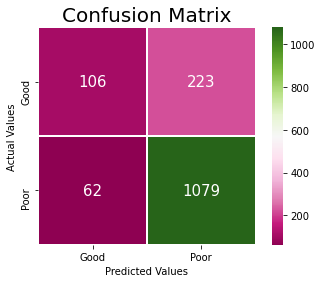

In [9]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Good", "Poor"], yticklabels=["Good", "Poor"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

# 80.41%? Improve again....
- Try to change hidden layer size to 1 hidden layers and 15,20,25 hidden unit

In [4]:
X_train = traindf[['density','alcohol', 'chlorides', 'volatile acidity', 'total sulfur dioxide']]
X_test = testdf[['density','alcohol', 'chlorides', 'volatile acidity', 'total sulfur dioxide']]
y_train = traindf["quality"]
y_test = testdf["quality"]

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [6]:
#Now use GridSearch CV to get the best model

#define the model and parameters
MLP = MLPClassifier()

parameters = {'max_iter': [500,1000],
              'hidden_layer_sizes':[(15,1),(20,1),(25,1)],
              'activation': ["logistic", "relu", "Tanh"],
              'random_state' : range(40,45)}

model = GridSearchCV(MLP, param_grid=parameters,  scoring = 'accuracy')
model = model.fit(X_train,y_train)
model.best_estimator_

MLPClassifier(hidden_layer_sizes=(20, 1), max_iter=500, random_state=40)

              precision    recall  f1-score   support

        Good     0.6310    0.3222    0.4266       329
        Poor     0.8287    0.9457    0.8833      1141

    accuracy                         0.8061      1470
   macro avg     0.7298    0.6339    0.6549      1470
weighted avg     0.7845    0.8061    0.7811      1470



Text(0.5, 1.0, 'Confusion Matrix')

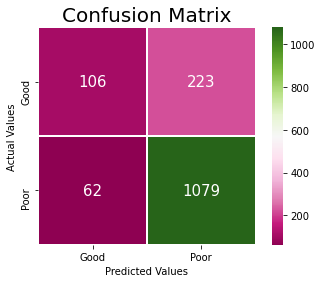

In [10]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Good", "Poor"], yticklabels=["Good", "Poor"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

# Overall Result : 80.61%